Face cropped and saved to: cropped_face.jpg


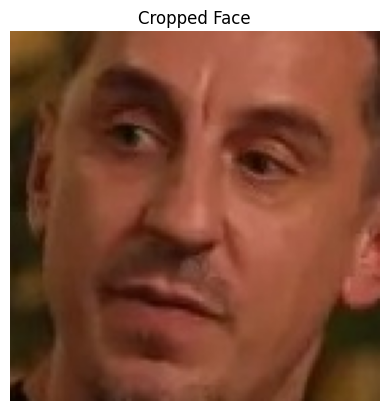

In [12]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

def detect_and_crop_face(image_path, output_path="cropped_face.jpg"):
    mp_face_detection = mp.solutions.face_detection
    mp_drawing = mp.solutions.drawing_utils

    img = cv2.imread("Img.jpg")
    if img is None:
        print("Image not found.")
        return

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
        results = face_detection.process(img_rgb)

        if not results.detections:
            print("No face detected.")
            return

        for detection in results.detections:
            bboxC = detection.location_data.relative_bounding_box
            ih, iw, _ = img.shape
            x = int(bboxC.xmin * iw)
            y = int(bboxC.ymin * ih)
            w = int(bboxC.width * iw)
            h = int(bboxC.height * ih)

            # Crop and save the face
            cropped_face = img[y:y+h, x:x+w]
            cv2.imwrite(output_path, cropped_face)
            print(f"Face cropped and saved to: {output_path}")
            return

def show_image(img_path):
    img = cv2.imread(img_path)
    if img is not None:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title("Cropped Face")
        plt.show()

if __name__ == "__main__":
    detect_and_crop_face("overlapping1.webp", "cropped_face.jpg")
    show_image("cropped_face.jpg")